# Traffic Sign Recognition Classifier



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Hackathon_Challenge/Traffic-sign-classification

/content/drive/MyDrive/Hackathon_Challenge/Traffic-sign-classification


In [3]:
!ls

ANC_Traffic_Sign_Classifier.h5	Road_Traffic_Sign_Classifier.ipynb
AugTrafficdata.npz		SAVE
Datasets			signname.csv
Example_Traffic_Signs


## Dataset
I downloded the German Traffic Sign Recognition Benchmark Data-set from the below source:
https://www.v7labs.com/open-datasets/gtsrb#:~:text=The%20German%20Traffic%20Sign%20Recognition,light%20conditions%20and%20rich%20backgrounds.&text=V7%20uses%20cookies%20to%20keep,your%20experience%20and%20for%20marketing.


## Import Packages and Load Dataset

In [4]:
# Visualizations will be shown in the notebook.
%matplotlib inline

# Load pickled data
import pickle
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pandas.io.parsers import read_csv


## Loading datasets
training_file = 'Datasets/train.p'
validation_file='Datasets/valid.p'
testing_file = 'Datasets/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
sign_names = read_csv("signname.csv").values[:, 1]
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


## Dataset Summary & Exploration

In [5]:
# Number of training examples
n_train = X_train.shape[0]
# Number of validation examples
n_validation = X_valid.shape[0]
# Number of testing examples.
n_test = X_test.shape[0]
# What's the shape of an traffic sign image?
image_shape = X_train[0].shape
# Unique classes/labels there are in the dataset.
classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
n_classes = len(class_counts)


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Histogram of class distrubtions across data set splits

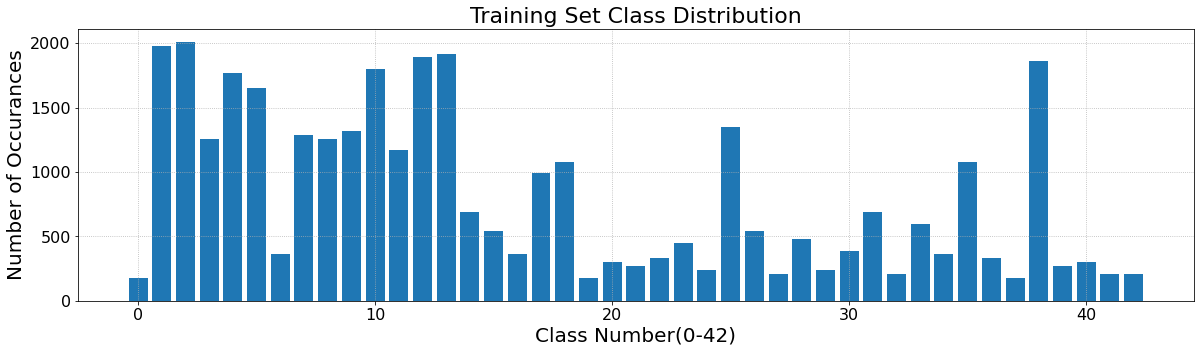

In [6]:
#Plot to show frequencies of data for Training dataset
plt.figure(0, figsize = (20,5))
unique_train, counts_train = np.unique(y_train, return_counts = True)
plt.bar(unique_train, counts_train)

plt.title('Training Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')


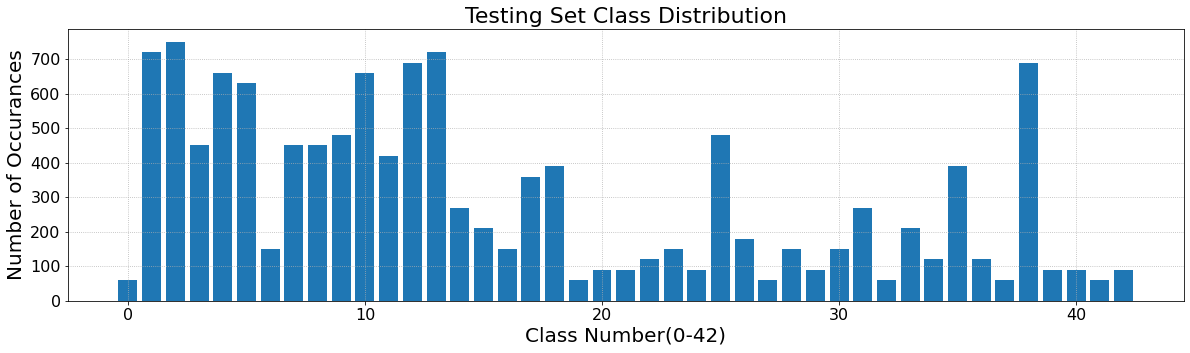

In [7]:
#Plot to show frequencies of data for Testing dataset
plt.figure(0, figsize = (20,5))
unique_test, counts_test = np.unique(y_test, return_counts = True)
plt.bar(unique_test, counts_test)

plt.title('Testing Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')


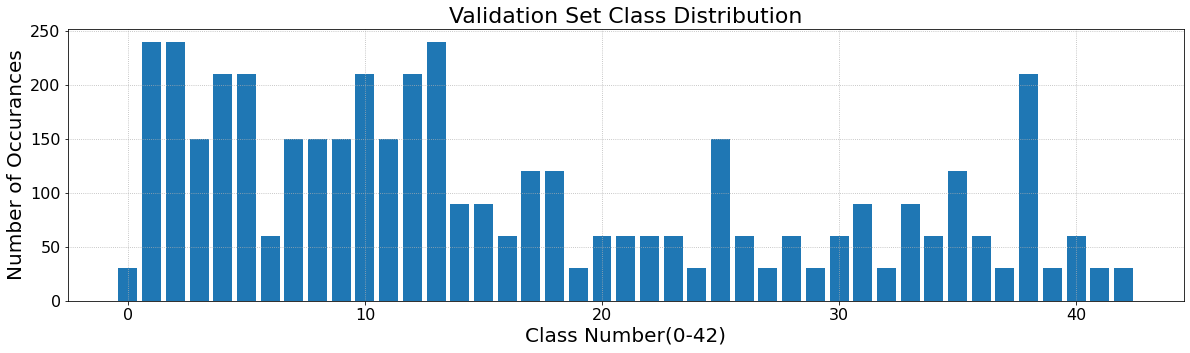

In [8]:
#Plot to show frequencies of data for Validation dataset
plt.figure(0, figsize = (20,5))
unique_valid, counts_valid = np.unique(y_valid, return_counts = True)
plt.bar(unique_valid, counts_valid)

plt.title('Validation Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')


### Visualise all Images Classes

0 . Class :  Speed limit (20km/h)


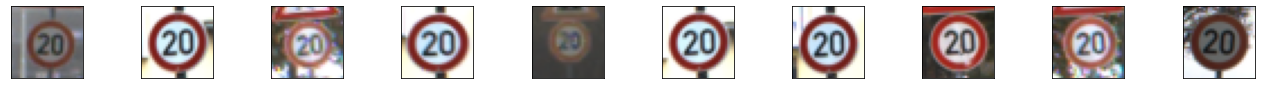

1 . Class :  Speed limit (30km/h)


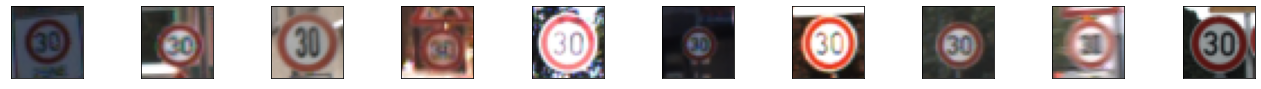

2 . Class :  Speed limit (50km/h)


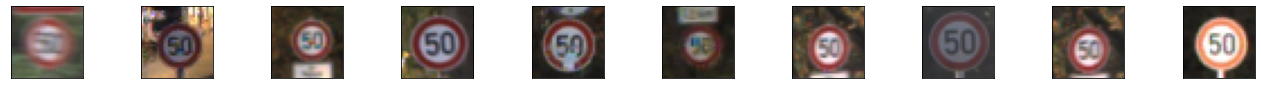

3 . Class :  Speed limit (60km/h)


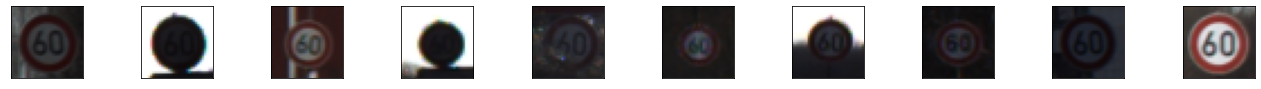

4 . Class :  Speed limit (70km/h)


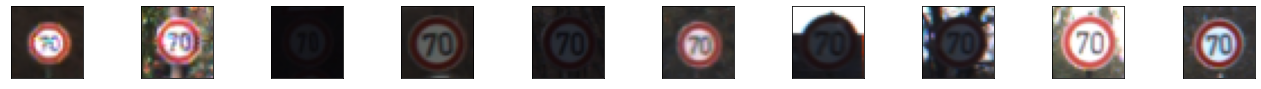

5 . Class :  Speed limit (80km/h)


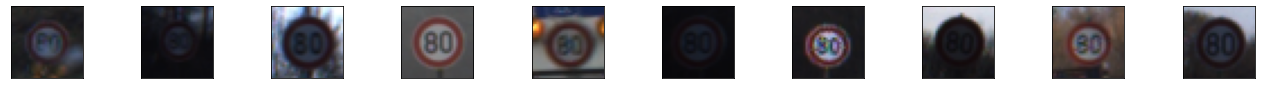

6 . Class :  End of speed limit (80km/h)


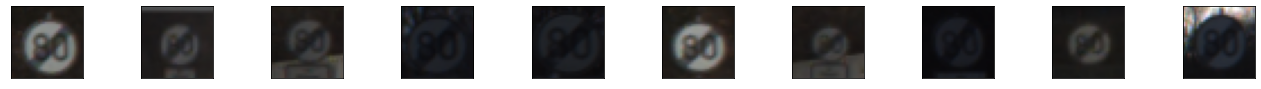

7 . Class :  Speed limit (100km/h)


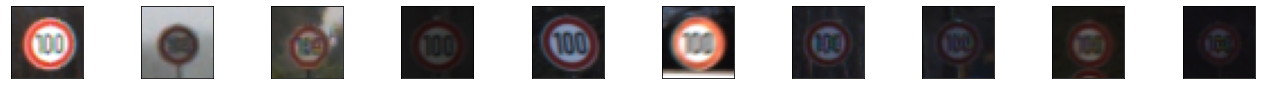

8 . Class :  Speed limit (120km/h)


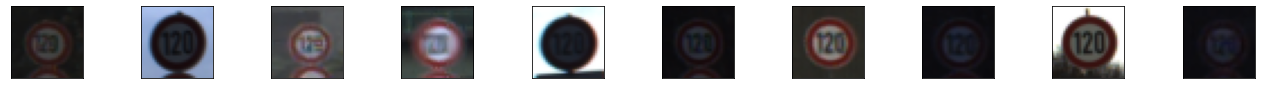

9 . Class :  No passing


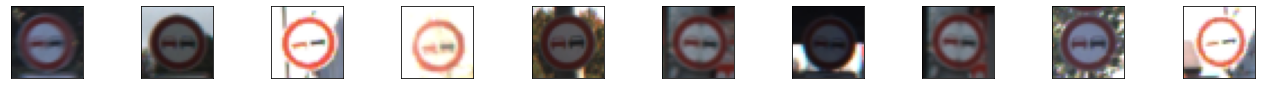

10 . Class :  No passing for vehicles over 3.5 metric tons


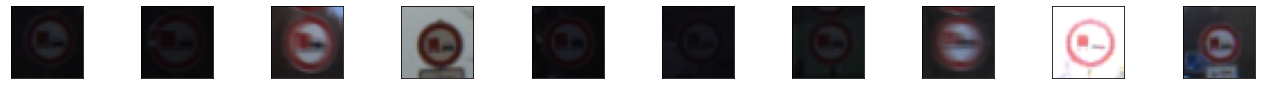

11 . Class :  Right-of-way at the next intersection


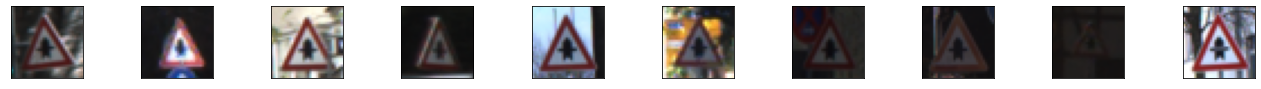

12 . Class :  Priority road


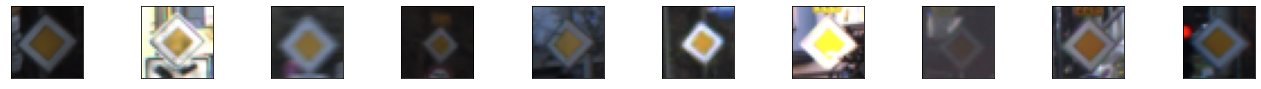

13 . Class :  Yield


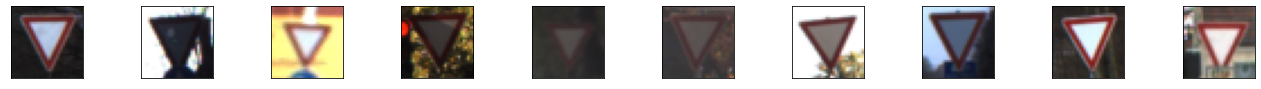

14 . Class :  Stop


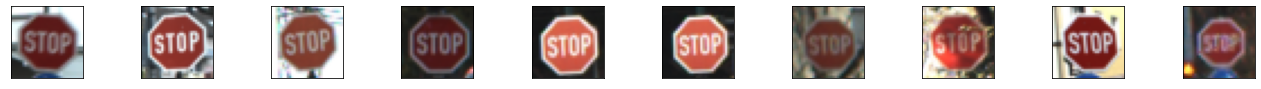

15 . Class :  No vehicles


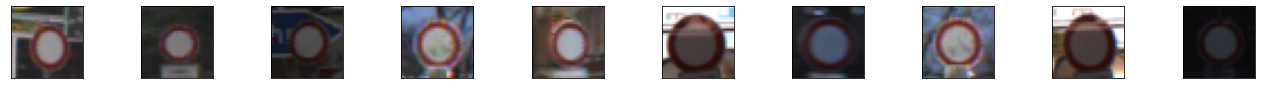

16 . Class :  Vehicles over 3.5 metric tons prohibited


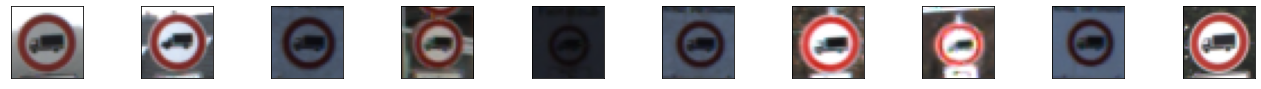

17 . Class :  No entry


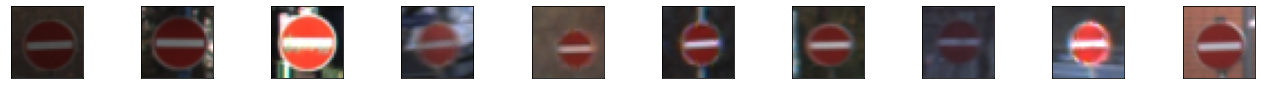

18 . Class :  General caution


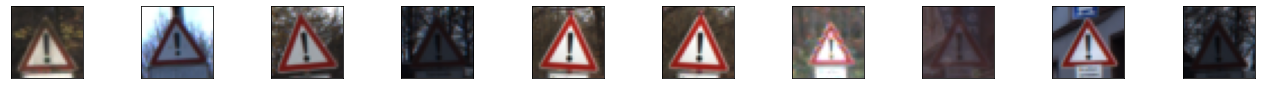

19 . Class :  Dangerous curve to the left


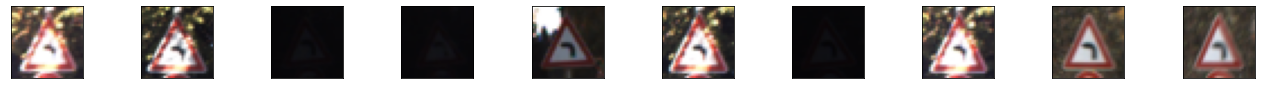

20 . Class :  Dangerous curve to the right


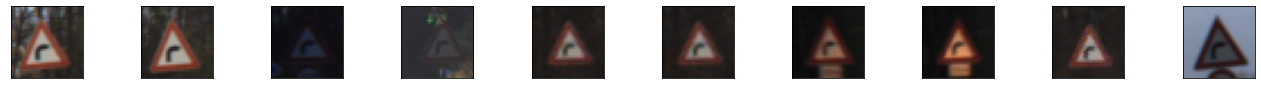

21 . Class :  Double curve


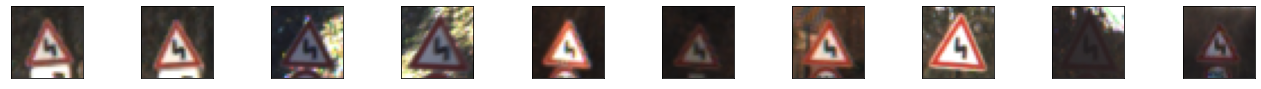

22 . Class :  Bumpy road


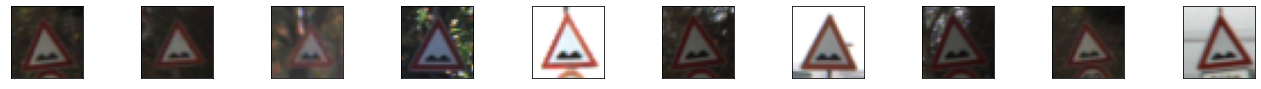

23 . Class :  Slippery road


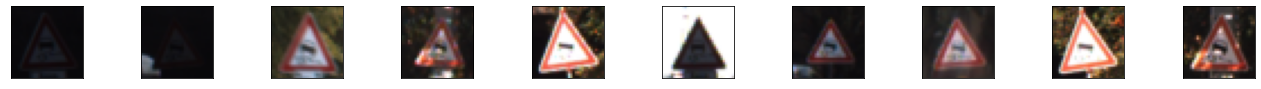

24 . Class :  Road narrows on the right


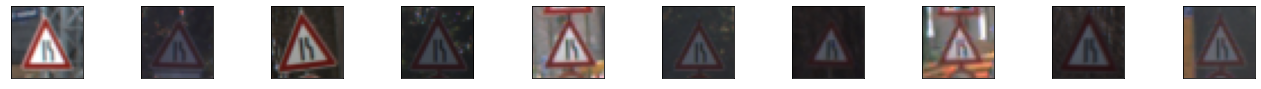

25 . Class :  Road work


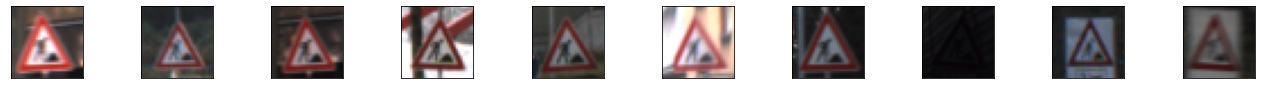

26 . Class :  Traffic signals


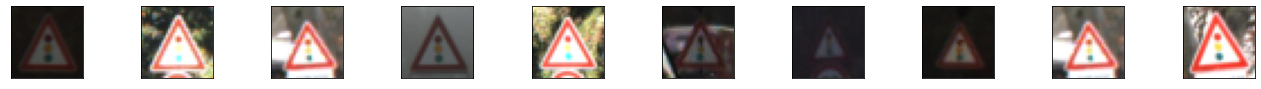

27 . Class :  Pedestrians


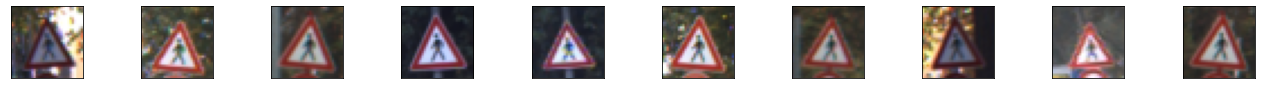

28 . Class :  Children crossing


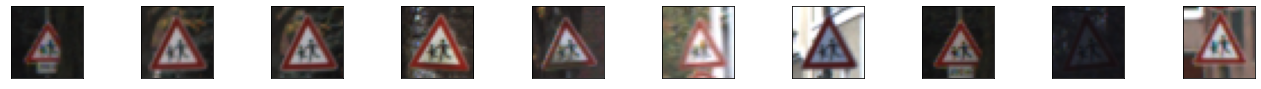

29 . Class :  Bicycles crossing


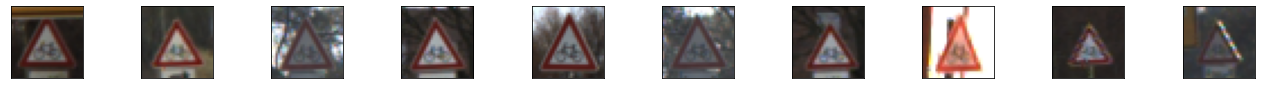

30 . Class :  Beware of ice/snow


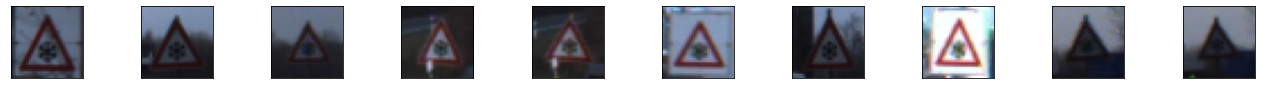

31 . Class :  Wild animals crossing


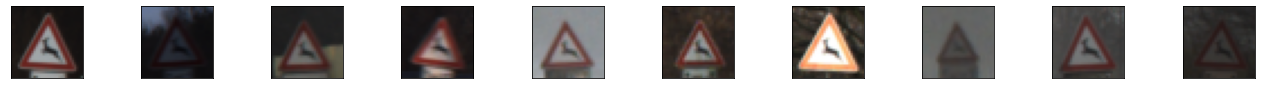

32 . Class :  End of all speed and passing limits


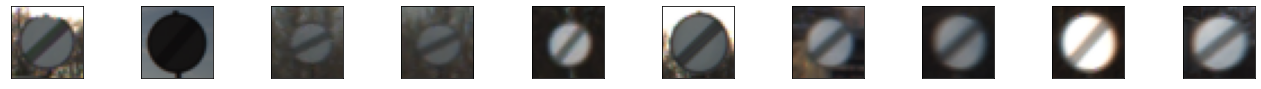

33 . Class :  Turn right ahead


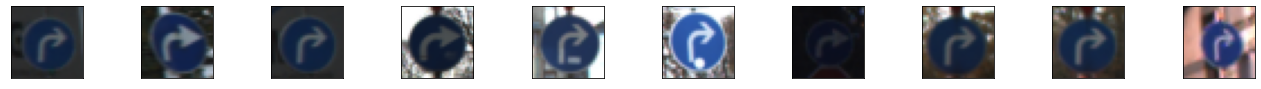

34 . Class :  Turn left ahead


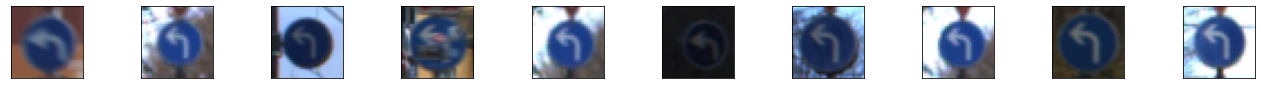

35 . Class :  Ahead only


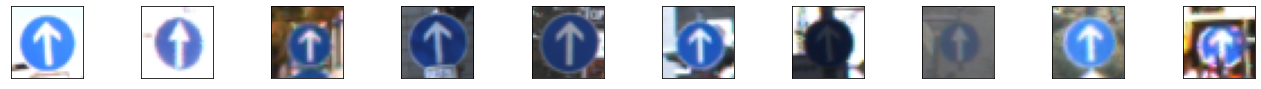

36 . Class :  Go straight or right


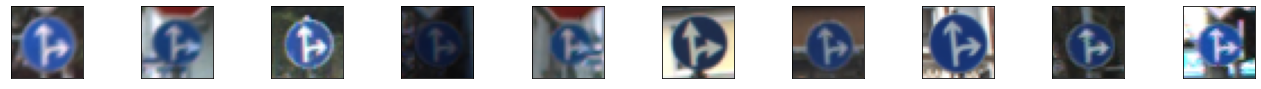

37 . Class :  Go straight or left


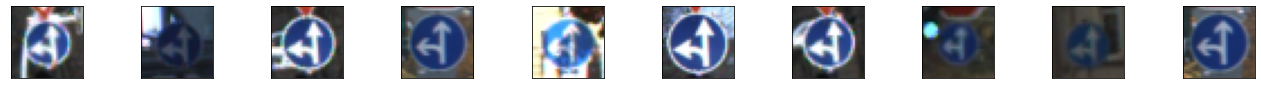

38 . Class :  Keep right


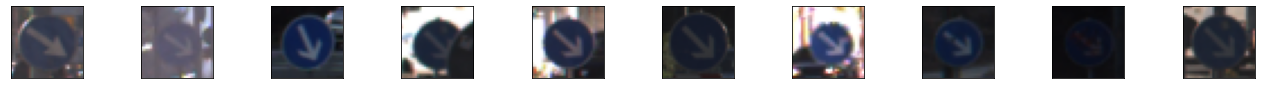

39 . Class :  Keep left


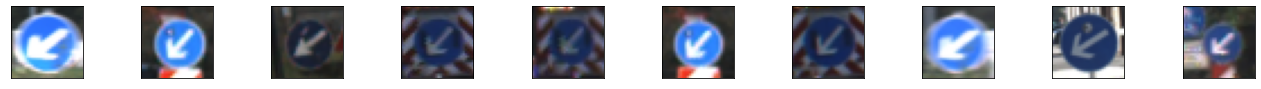

40 . Class :  Roundabout mandatory


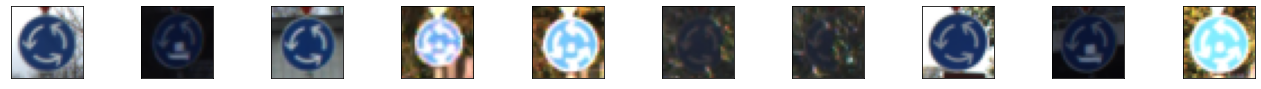

41 . Class :  End of no passing


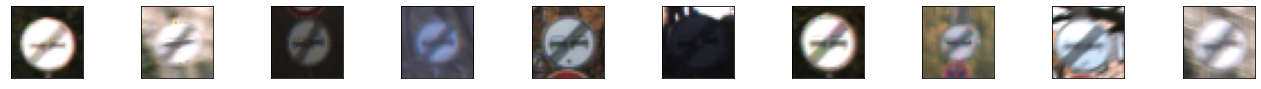

42 . Class :  End of no passing by vehicles over 3.5 metric


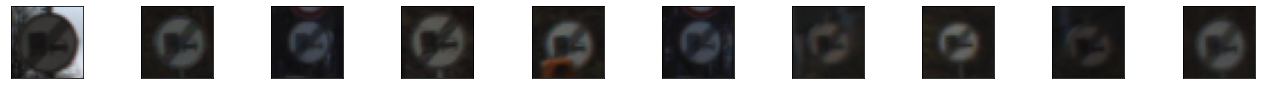

In [9]:
#Visualizations of image datasets for each class
for c, c_i, c_count in zip(classes, class_indices, class_counts):
    print(c, ". Class : ", sign_names[c] )
    fig = pyplot.figure(figsize = (18, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        random_indices = np.random.randint(c_i, c_i+c_count, 10)
        axis.imshow(X_train[random_indices[i],:,:,:])
        #axis.text(0, 0, '{}: {}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=8)
        
    pyplot.show()

### Breif Visual Overview of the Dataset

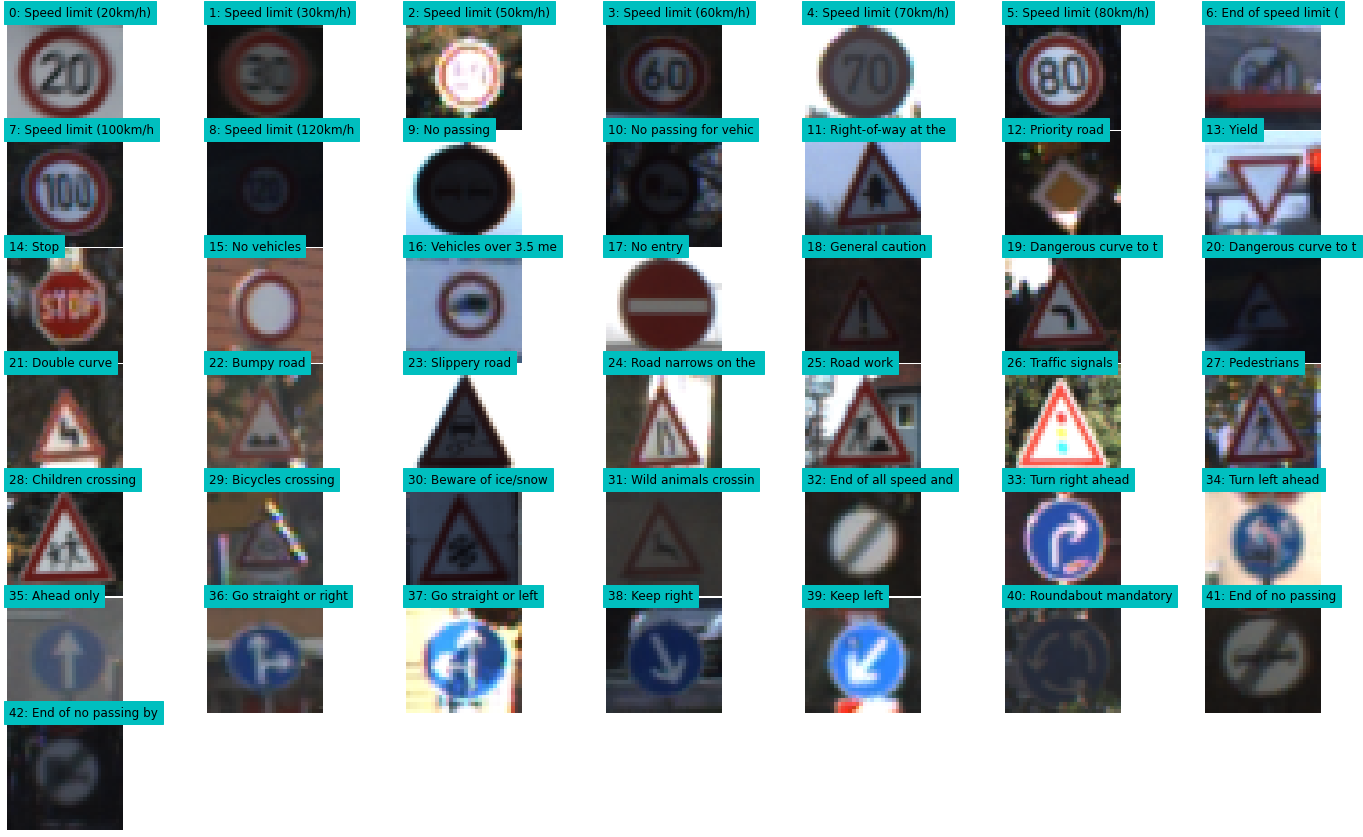

In [10]:
#Showing Random image datasets for each class
def plot_random_each_class(n_row,n_col,X,y):

    plt.figure(figsize = (25,15))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.01) # set the spacing between axes. 

    for c, c_i, c_count in zip(classes, class_indices, class_counts):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[c])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(c_i, c_i+c_count)
        plt.imshow(X[ind_plot])
        #plt.text(2,4,str(y[ind_plot]),color='k',backgroundcolor='c', fontsize=15)
        plt.text(0, 0, '{}: {:.20}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=12)
        
        plt.axis('off')
    plt.show()

plot_random_each_class(7,7,X_train,y_train)

 
## Data Augmentation


Since the distribution of classes over the data set is extreamly unblanced.We can use data augmentation to create more datsets because unbalanced datasets will cause a heavy amount of bias in the training process.


In [11]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
import cv2

def rotate_image(image, max_angle =15):
    rotate_out = rotate(image, np.random.uniform(-max_angle, max_angle), mode='edge')
    return rotate_out

def translate_image(image, max_trans = 5, height=32, width=32):
    translate_x = max_trans*np.random.uniform() - max_trans/2
    translate_y = max_trans*np.random.uniform() - max_trans/2
    translation_mat = np.float32([[1,0,translate_x],[0,1,translate_y]])
    trans = cv2.warpAffine(image, translation_mat, (height,width))
    return trans
    
def projection_transform(image, max_warp=0.8, height=32, width=32):
    #Warp Location
    d = height * 0.3 * np.random.uniform(0,max_warp)
    
    #Warp co-ordinates
    tl_top = np.random.uniform(-d, d)     # Top left corner, top margin
    tl_left = np.random.uniform(-d, d)    # Top left corner, left margin
    bl_bottom = np.random.uniform(-d, d)  # Bottom left corner, bottom margin
    bl_left = np.random.uniform(-d, d)    # Bottom left corner, left margin
    tr_top = np.random.uniform(-d, d)     # Top right corner, top margin
    tr_right = np.random.uniform(-d, d)   # Top right corner, right margin
    br_bottom = np.random.uniform(-d, d)  # Bottom right corner, bottom margin
    br_right = np.random.uniform(-d, d)   # Bottom right corner, right margin
        
    ##Apply Projection
    transform = ProjectiveTransform()
    transform.estimate(np.array((
                (tl_left, tl_top),
                (bl_left, height - bl_bottom),
                (height - br_right, height - br_bottom),
                (height - tr_right, tr_top)
            )), np.array((
                (0, 0),
                (0, height),
                (height, height),
                (height, 0)
            )))
    output_image = warp(image, transform, output_shape=(height, width), order = 1, mode = 'edge')
    return output_image
    

def transform_image(image, max_angle=15, max_trans =5 ,max_warp=0.8):
    ## Simple pipline to take an input image and apply a serise of simple
    ## Distortions to augment the training data set
    ## (note: this function will rescale pixel values between 0-1)
    ##
    height, width, channels = image.shape
    #Rotate Image
    rotated_image = rotate_image(image, max_angle)
    #Translate Image
    translated_image = translate_image(rotated_image, max_trans, height, width)
    #Project Image
    output_image = projection_transform(translated_image, max_warp, height, width)
    return (output_image*255.0).astype(np.uint8)

    
def augment_and_balance_data(X_train, y_train, no_examples_per_class =5000):
    
    n_examples = no_examples_per_class
    #Get paramters of data
    classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
    height, width, channels = X_train[0].shape
    
    
    #Create new data and labels for the balanced augmented data
    X_balance = np.empty([0, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
    y_balance = np.empty([0], dtype = y_train.dtype)
    

    for c, count in zip(range(n_classes), class_counts):
        ##Copy over the current data for the given class
        X_orig = X_train[y_train == c]
        y_orig = y_train[y_train == c]
        ##Add original data to the new dataset
        X_balance = np.append(X_balance, X_orig, axis=0)
        print(c,count)
        temp_X = np.empty([n_examples-count, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
        for i in range(n_examples - count):
            temp_X[i,:,:,:] = transform_image(X_orig[i%count]).reshape((1, height, width, channels))
            
            
        X_balance = np.append(X_balance,temp_X, axis=0)
        n_added_ex = X_balance.shape[0] - y_balance.shape[0]
        y_balance = np.append(y_balance, np.full(n_added_ex, c, dtype =int))
        
   
    return X_balance.astype(np.uint8), y_balance
        
    

### Data Augmentation by Rotation

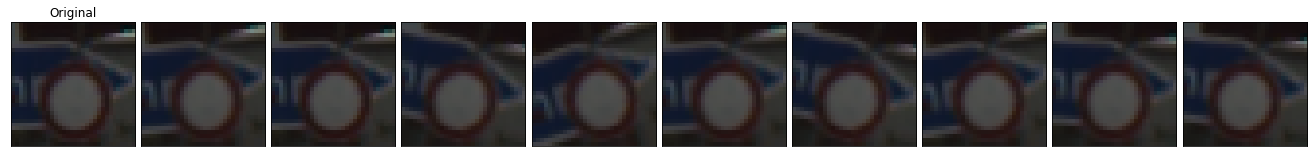

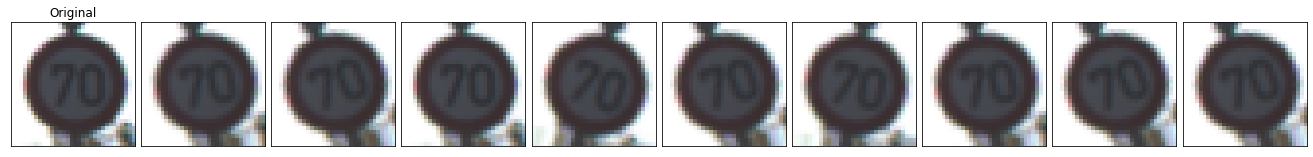

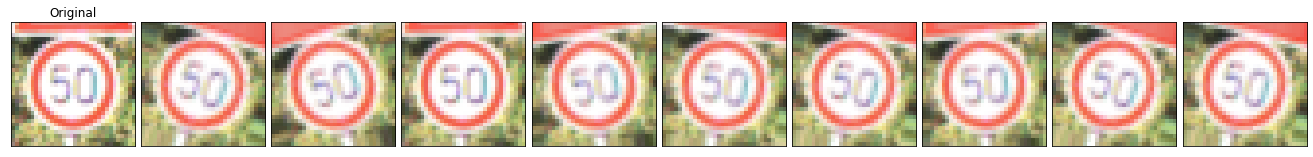

In [13]:
no_examples = 3
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:    
            axis.imshow(rotate_image(X_train[image[j],:,:,:], 20))
    pyplot.show()

### Data Augmentation by Translation

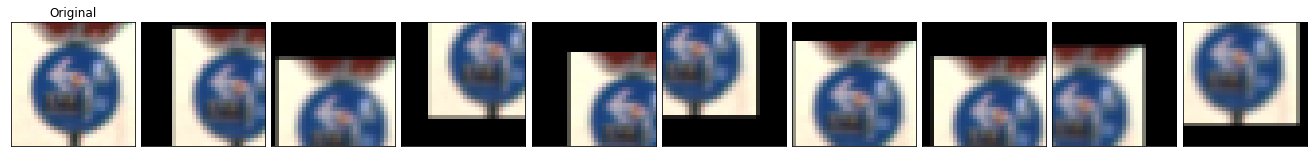

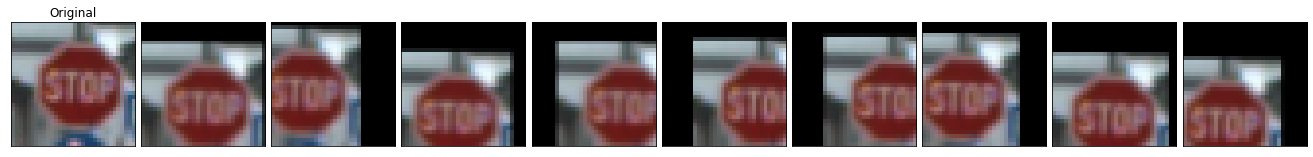

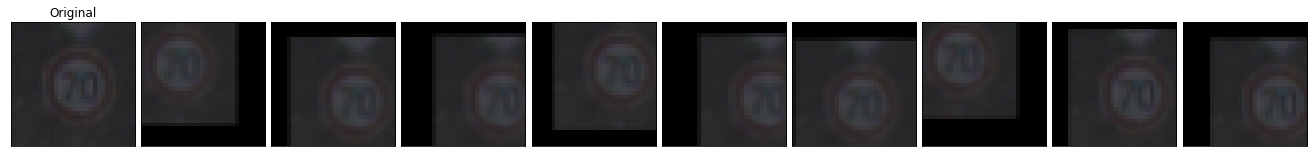

In [14]:
no_examples = 3
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:    
            axis.imshow(translate_image(X_train[image[j],:,:,:], 20))
    pyplot.show()

### Data Augmentation by Homography Projection

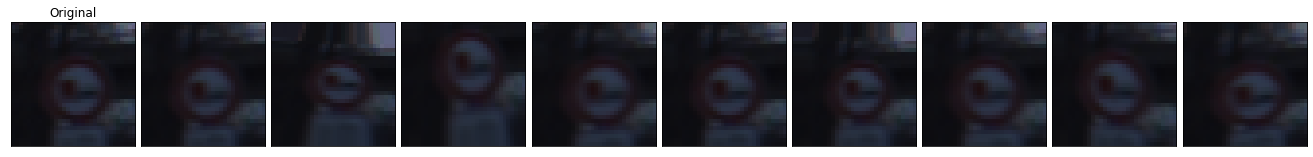

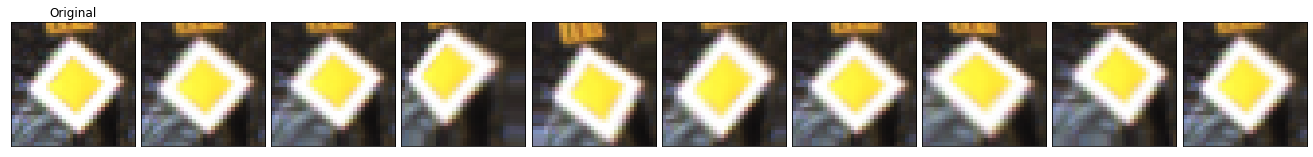

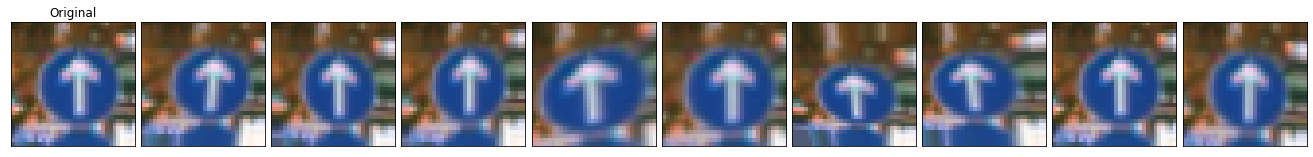

In [15]:
no_examples = 3
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:    
            axis.imshow(projection_transform(X_train[image[j],:,:,:]))
    pyplot.show()

### Pipeline for Data Augmentation

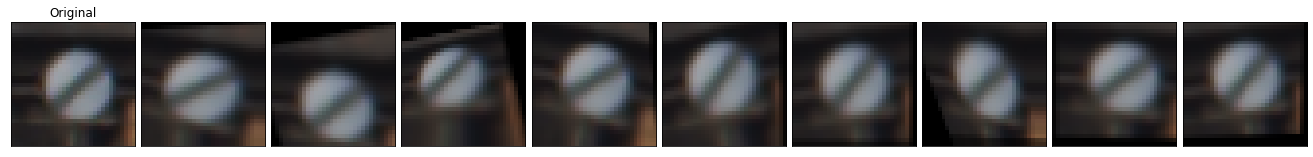

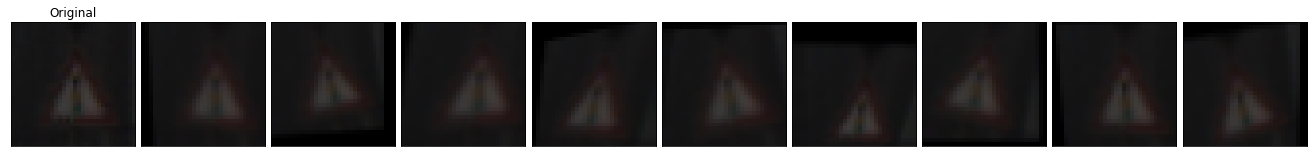

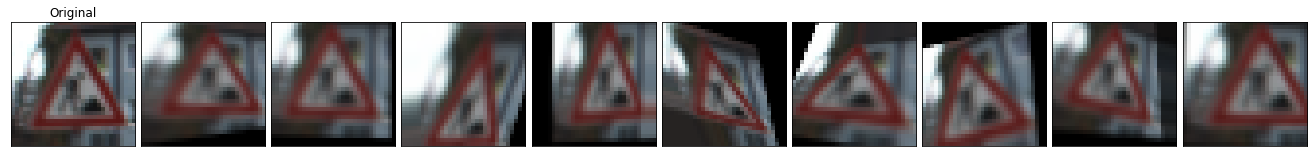

In [16]:
no_examples = 3
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:    
            axis.imshow(transform_image(X_train[image[j],:,:,:]))
    pyplot.show()

### Generate or Load Augmented Dataset

In [17]:
####Only Run to generate Augmented data

#X_out, y_out = augment_and_balance_data(X_train, y_train, 5000)
#np.savez_compressed('Datasets/Augmented_Data/AugTrafficdata', X_train_aug = X_out, y_train_aug = y_out)

In [18]:
##Load augmented data

loaded = np.load('Datasets/Augmented_Data/AugTrafficdata.npz')
X_train_aug = loaded['X_train_aug']
y_train_aug = loaded['y_train_aug']
print("Augmented Dataset size X", X_train_aug.shape)
print("Augmented Dataset size y", y_train_aug.shape)


Augmented Dataset size X (215000, 32, 32, 3)
Augmented Dataset size y (215000,)



## Deep Classification Architectures


We will consider AlexNet convolutional neural network architectures for this challenge.

AlexNet (2012)(CIFAR10 Style) :  Classic architecture with additional Batch Normalisation layers to assist training


### Tensorflow Installation

In [19]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



## Training and Running the Model

In [20]:
!ls

ANC_Traffic_Sign_Classifier.h5	Road_Traffic_Sign_Classifier.ipynb
AugTrafficdata.npz		SAVE
Datasets			signname.csv
Example_Traffic_Signs


In [21]:
data = np.load('AugTrafficdata.npz')
lst = data.files
for item in lst:
    print(item)
    #print(data[item])

X_train_aug
y_train_aug


### Preprocess Data

In [22]:
from keras.utils import to_categorical

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_valid = to_categorical(y_valid, 43)


In [32]:
#Important Packages for AlexNet Model
import tensorflow as  tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

#creating the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters = 32,kernel_size = (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(filters = 64,kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 64,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(43, activation = 'softmax'))

#compiling the model
model.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [34]:
#fitting the model
anc = model.fit(X_train,y_train, batch_size = 32, epochs = 15, validation_data = (X_valid,y_valid))
model.save("ANC_Traffic_Sign_Classifier.h5")

Epoch 1/15
1088/1088 [==============================] - 220s 201ms/step - loss: 0.9515 - accuracy: 0.7316 - val_loss: 0.2624 - val_accuracy: 0.9222
Epoch 2/15
1088/1088 [==============================] - 216s 198ms/step - loss: 0.1680 - accuracy: 0.9484 - val_loss: 0.1454 - val_accuracy: 0.9592
Epoch 3/15
1088/1088 [==============================] - 217s 200ms/step - loss: 0.1088 - accuracy: 0.9661 - val_loss: 0.1374 - val_accuracy: 0.9558
Epoch 4/15
1088/1088 [==============================] - 213s 196ms/step - loss: 0.0826 - accuracy: 0.9747 - val_loss: 0.1133 - val_accuracy: 0.9678
Epoch 5/15
1088/1088 [==============================] - 214s 197ms/step - loss: 0.0628 - accuracy: 0.9799 - val_loss: 0.1203 - val_accuracy: 0.9698
Epoch 6/15
1088/1088 [==============================] - 214s 197ms/step - loss: 0.0608 - accuracy: 0.9809 - val_loss: 0.1442 - val_accuracy: 0.9685
Epoch 7/15
1088/1088 [==============================] - 216s 199ms/step - loss: 0.0560 - accuracy: 0.9836 - val_

In [35]:
#Loading Saved model
new_model1 = tf.keras.models.load_model('ANC_Traffic_Sign_Classifier.h5')

In [36]:
#evaluating the model 1
score = new_model1.evaluate(X_test,y_test, verbose = 0)
print('Test Score of Model 1: ', score[0])
print('Test Accuracy of Model1 : ', score[1]*100, ' %')

Test Score of Model 1:  0.18075789511203766
Test Accuracy of Model1 :  96.69833779335022  %


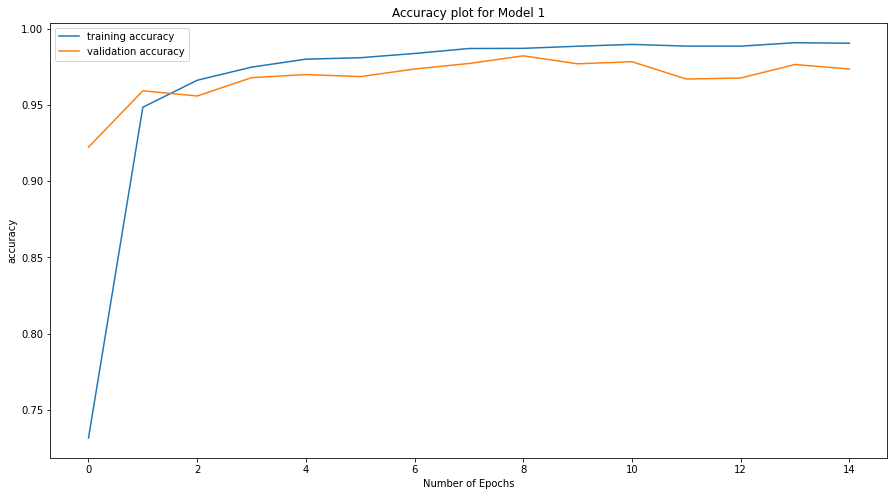

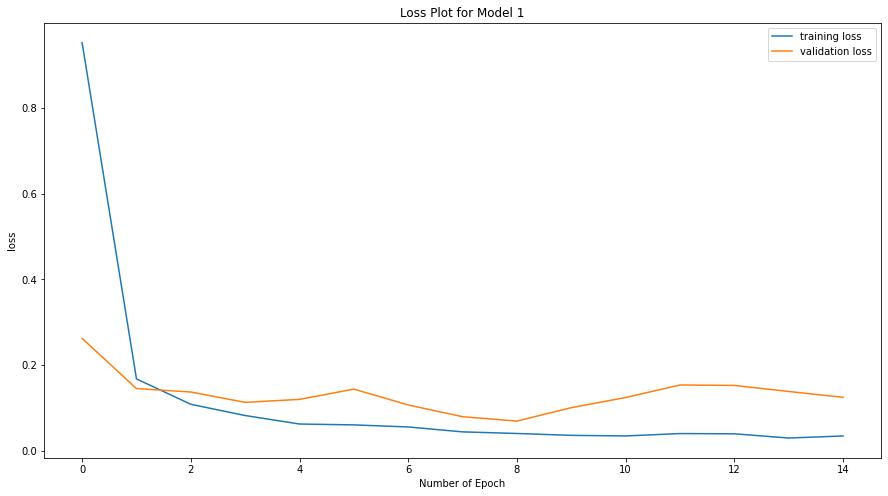

In [37]:
#plotting graphs for accuracy for model 1
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 8))
plt.plot(anc.history['accuracy'], label = 'training accuracy')
plt.plot(anc.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy plot for Model 1')
plt.xlabel('Number of Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print("\n")
plt.figure(figsize = (15, 8))
plt.plot(anc.history['loss'], label = "training loss")
plt.plot(anc.history['val_loss'], label = "validation loss")
plt.title("Loss Plot for Model 1")
plt.xlabel("Number of Epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

## Creating Model 2

In [38]:
#fitting the model 2
anc2 = model.fit(X_train,y_train, batch_size = 64, epochs = 20, validation_data = (X_valid,y_valid))
model.save("ANC_Traffic_Sign_Classifier_model2.h5")

Epoch 1/20
544/544 [==============================] - 224s 413ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.1250 - val_accuracy: 0.9796
Epoch 2/20
544/544 [==============================] - 213s 392ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.1129 - val_accuracy: 0.9762
Epoch 3/20
544/544 [==============================] - 214s 394ms/step - loss: 0.0181 - accuracy: 0.9946 - val_loss: 0.1004 - val_accuracy: 0.9787
Epoch 4/20
544/544 [==============================] - 215s 395ms/step - loss: 0.0161 - accuracy: 0.9953 - val_loss: 0.1082 - val_accuracy: 0.9812
Epoch 5/20
544/544 [==============================] - 227s 418ms/step - loss: 0.0191 - accuracy: 0.9943 - val_loss: 0.0954 - val_accuracy: 0.9764
Epoch 6/20
544/544 [==============================] - 215s 395ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.1064 - val_accuracy: 0.9787
Epoch 7/20
544/544 [==============================] - 213s 393ms/step - loss: 0.0191 - accuracy: 0.9946 - val_loss: 0.1725 -

In [39]:
#Loading Saved model 2
new_model2 = tf.keras.models.load_model('ANC_Traffic_Sign_Classifier_model2.h5')

In [40]:
#evaluating the model 2
score2 = new_model2.evaluate(X_test,y_test, verbose = 0)
print('Test Score of Model 2: ', score2[0])
print('Test Accuracy of Model 2: ', score2[1]*100, ' %')

Test Score of Model 2:  0.2298126220703125
Test Accuracy of Model 2:  96.95170521736145  %


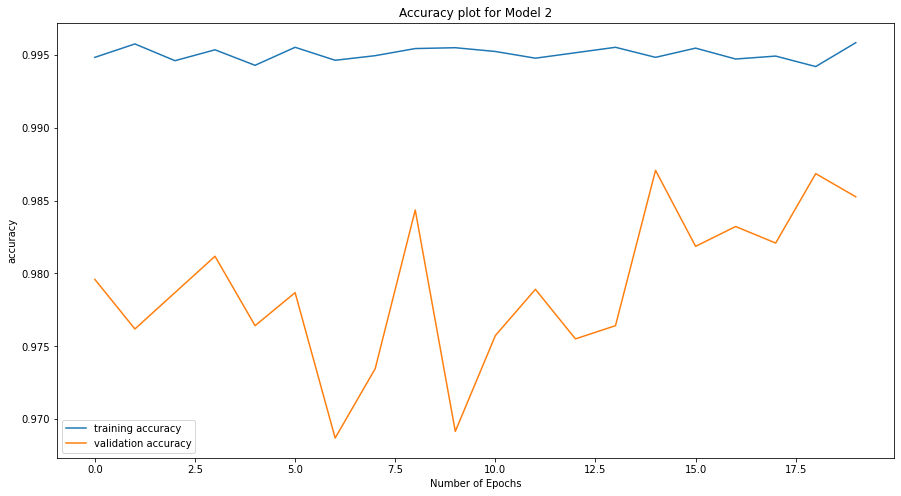

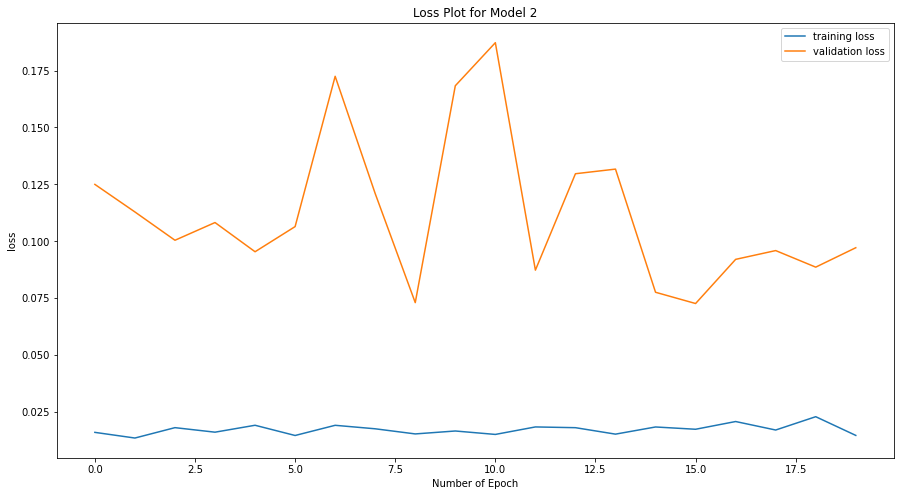

In [41]:
#plotting graphs for accuracy for model 2
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 8))
plt.plot(anc2.history['accuracy'], label = 'training accuracy')
plt.plot(anc2.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy plot for Model 2')
plt.xlabel('Number of Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print("\n")
plt.figure(figsize = (15, 8))
plt.plot(anc2.history['loss'], label = "training loss")
plt.plot(anc2.history['val_loss'], label = "validation loss")
plt.title("Loss Plot for Model 2")
plt.xlabel("Number of Epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

## Creating Model 3

In [42]:
#fitting the model 3
anc3 = model.fit(X_train,y_train, batch_size = 128, epochs = 10, validation_data = (X_valid,y_valid))
model.save("ANC_Traffic_Sign_Classifier_model3.h5")

Epoch 1/10
272/272 [==============================] - 212s 781ms/step - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.0960 - val_accuracy: 0.9796
Epoch 2/10
272/272 [==============================] - 210s 772ms/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.0850 - val_accuracy: 0.9810
Epoch 3/10
272/272 [==============================] - 206s 759ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.0730 - val_accuracy: 0.9857
Epoch 4/10
272/272 [==============================] - 207s 762ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0954 - val_accuracy: 0.9810
Epoch 5/10
272/272 [==============================] - 212s 780ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0731 - val_accuracy: 0.9882
Epoch 6/10
272/272 [==============================] - 208s 763ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.1102 - val_accuracy: 0.9766
Epoch 7/10
272/272 [==============================] - 207s 761ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.0951 -

In [43]:
#Loading Saved model 3
new_model3 = tf.keras.models.load_model('ANC_Traffic_Sign_Classifier_model3.h5')

In [44]:
#evaluating the model 3
score3 = new_model3.evaluate(X_test,y_test, verbose = 0)
print('Test Score of Model 3: ', score3[0])
print('Test Accuracy of Model 3: ', score3[1]*100, ' %')

Test Score of Model 3:  0.2447713315486908
Test Accuracy of Model 3:  96.79334759712219  %


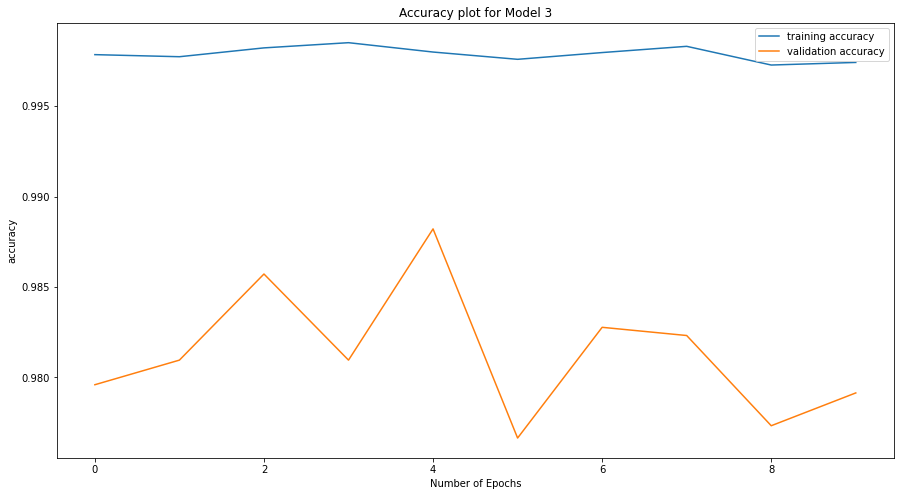

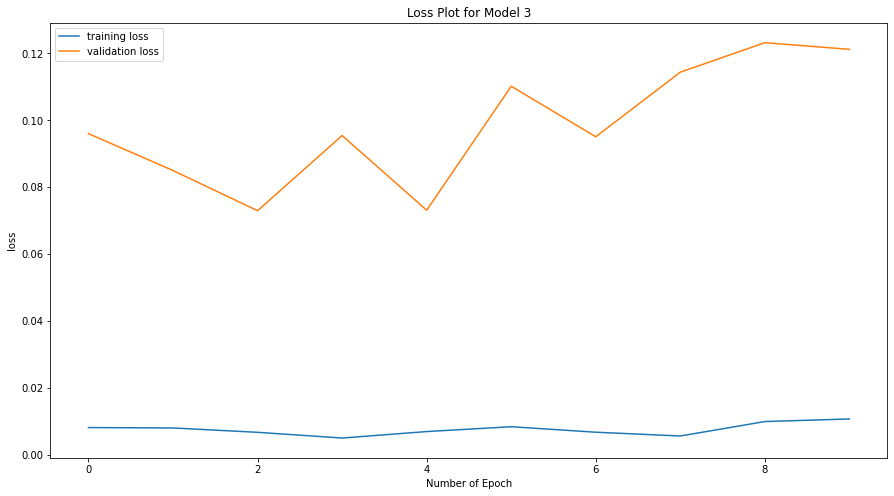

In [46]:
#plotting graphs for accuracy for model 3
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 8))
plt.plot(anc3.history['accuracy'], label = 'training accuracy')
plt.plot(anc3.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy plot for Model 3')
plt.xlabel('Number of Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print("\n")
plt.figure(figsize = (15, 8))
plt.plot(anc3.history['loss'], label = "training loss")
plt.plot(anc3.history['val_loss'], label = "validation loss")
plt.title("Loss Plot for Model 3")
plt.xlabel("Number of Epoch")
plt.ylabel("loss")
plt.legend()
plt.show()